### plot reynolds averaged data

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
from ipdb import set_trace as mybreak
import pyicon as pyic
import cartopy.crs as ccrs
from matplotlib_scalebar.scalebar import ScaleBar
import glob
import pickle
import maps_icon_smt_temp as smt
import datetime
from matplotlib.patches import Rectangle
import cfgrib
import xarray as xr
import pandas as pd
import gsw
import matplotlib.gridspec as gridspec
from icon_smt_levels import dzw, dzt, depthc, depthi

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [8]:
path_data    = f'/scratch/u/u241317/dask_tmp/ngSMT_tke//examp_time_averaging_with_dask_wb_prime_17.nc'
wb_prime = xr.open_dataset(path_data)
path_data    = f'/scratch/u/u241317/dask_tmp/ngSMT_tke//examp_time_averaging_with_dask_b_16.nc'
b_mean = xr.open_dataset(path_data)
path_data    = f'/scratch/u/u241317/dask_tmp/ngSMT_tke//examp_time_averaging_with_dask_w_16.nc'
w_mean = xr.open_dataset(path_data)
path_data    = f'/scratch/u/u241317/dask_tmp/ngSMT_tke//examp_time_averaging_with_dask_T_17.nc'
T_mean = xr.open_dataset(path_data)
path_data    = f'/scratch/u/u241317/dask_tmp/ngSMT_tke//examp_time_averaging_with_dask_wT_prime_16.nc'
wT_prime = xr.open_dataset(path_data)

In [3]:
# depth
iz = 20
print('depth =', depthi[iz])
# coriolis
f=2*2*np.pi/86400*np.sin(40*np.pi/180.)
f2 = f**2
ftime0 = '2010-03-16T07:00:00'
f

path_data    = f'/work/mh0033/u241317/smt/N2/pp_calc_N2_period_{ftime0}.nc'
dN2 = xr.open_dataset(path_data)
#N2 = dN2.isel(depthi=iz).N2

path_data    = f'/work/mh0033/u241317/smt/db/pp_calc_b_period_{ftime0}.nc'
db = xr.open_dataset(path_data)
#b  = db.b.isel(depthi=iz)

path_data    = f'/work/mh0033/u241317/smt/w/pp_calc_w_{ftime0}.nc'
dw = xr.open_dataset(path_data)
#w = dw.isel(depthi=iz).w


depth = 62.0


In [5]:
lon_regm = [-61, -60.6]
lon_regm = [-64, -60]
lat_regm = [39.8, 41.5]
fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [8]:
A = db.b #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()

<ipython-input-9-28f4e7ca83dc>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi, toi,  vmin=-0.022, vmax=-0.012, cmap='RdYlBu_r')


(60.0, 0.0)

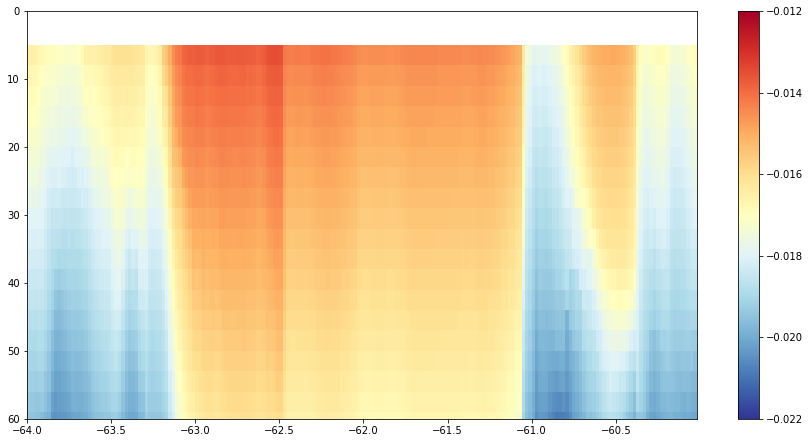

In [9]:
ylim=(60,0)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi, toi,  vmin=-0.022, vmax=-0.012, cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
#ax0.set_title('pcolormesh with levels')
ax0.set_ylim(ylim)

In [11]:
A = b_mean.b #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()

<ipython-input-13-7d8e146c347e>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi[:20], toi,  vmin=-0.022, vmax=-0.012, cmap='RdYlBu_r')


(60.0, 0.0)

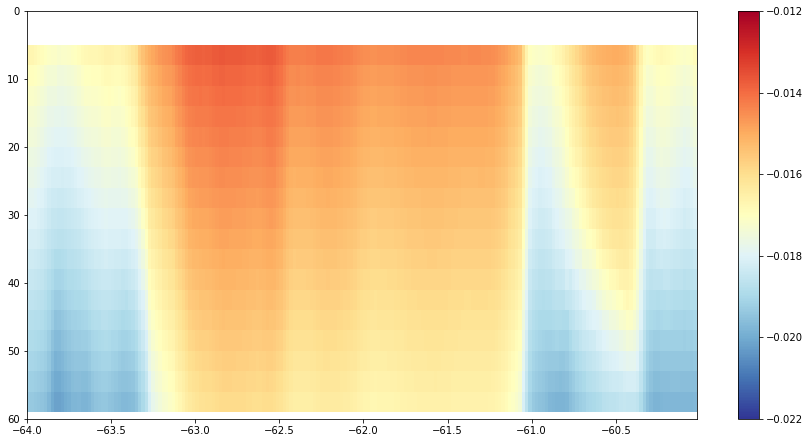

In [13]:
ylim=(60,0)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi[:20], toi,  vmin=-0.022, vmax=-0.012, cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
#ax0.set_title('pcolormesh with levels')
ax0.set_ylim(ylim)

In [14]:
A = w_mean.w #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()

<ipython-input-17-57d7df2abc7b>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi[:20], toi, vmin=-1e-3, vmax=1e-3,  cmap='RdYlBu_r')


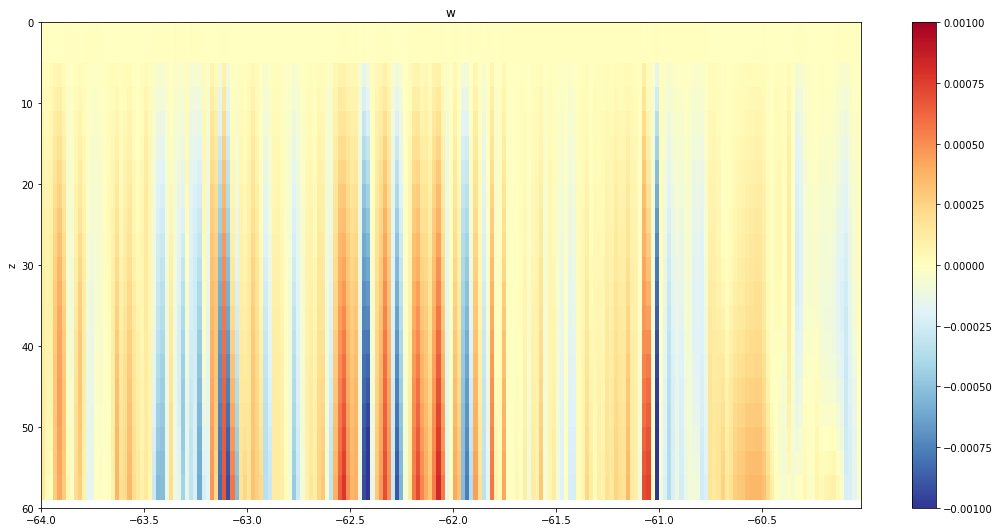

In [17]:
ylim=(60,0)
#xlim=(-61.5,-60.25)
levels=np.linspace(-5e-2,5e-2, 30)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi[:20], toi, vmin=-1e-3, vmax=1e-3,  cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_ylim(ylim)
#ax0.set_xlim(xlim)
ax0.set_ylabel('z')
ax0.set_title('w')
fig.tight_layout()
#plt.savefig('../../../pics/Panel_Meeting/w_vert.pdf', dpi=150, format='pdf')

<ipython-input-6-efa8b55cf255>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi, toi, vmin=-1e-3, vmax=1e-3,  cmap='RdYlBu_r')


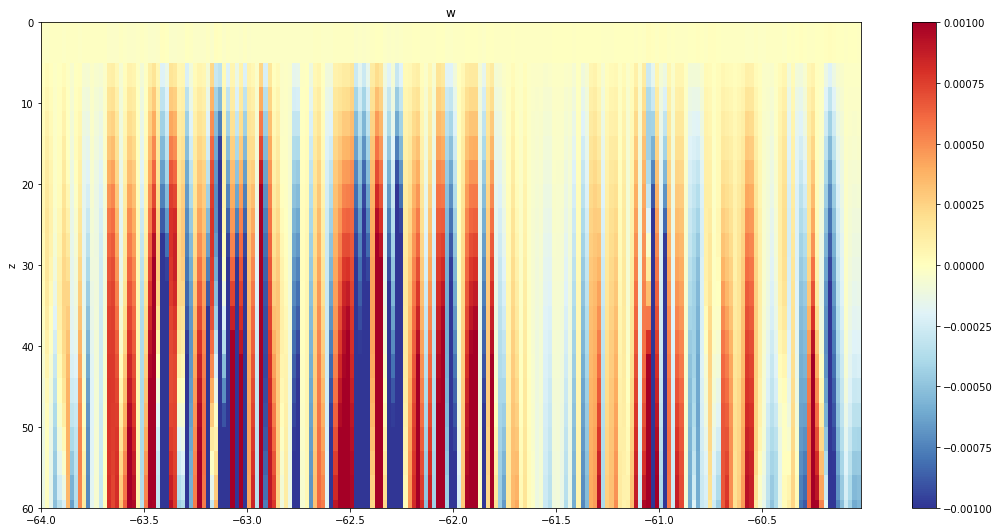

In [6]:
A = dw.w #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()
ylim=(60,0)
#xlim=(-61.5,-60.25)
levels=np.linspace(-5e-2,5e-2, 30)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi, toi, vmin=-1e-3, vmax=1e-3,  cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_ylim(ylim)
#ax0.set_xlim(xlim)
ax0.set_ylabel('z')
ax0.set_title('w')
fig.tight_layout()
#plt.savefig('../../../pics/Panel_Meeting/w_vert.pdf', dpi=150, format='pdf')

In [9]:
A = wb_prime.__xarray_dataarray_variable__ #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()

<ipython-input-14-17ee61c577c0>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi[:20], toi, vmin=-1e-6, vmax=1e-6,  cmap='RdYlBu_r')


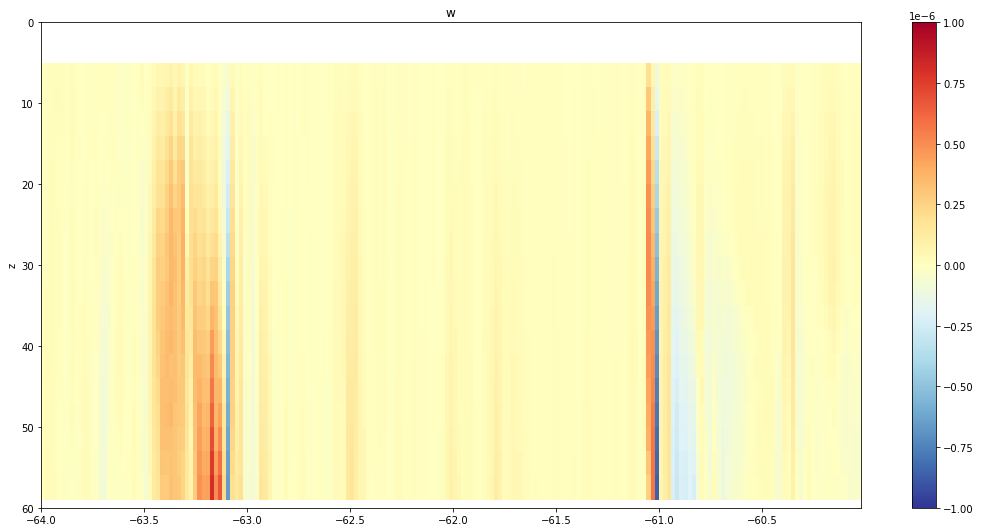

In [14]:
ylim=(60,0)
#xlim=(-61.5,-60.25)
levels=np.linspace(-5e-2,5e-2, 30)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi[:20], toi, vmin=-1e-6, vmax=1e-6,  cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_ylim(ylim)
#ax0.set_xlim(xlim)
ax0.set_ylabel('z')
ax0.set_title('wb_prime')
fig.tight_layout()
#plt.savefig('../../../pics/Panel_Meeting/w_vert.pdf', dpi=150, format='pdf')

In [6]:
A = wT_prime.__xarray_dataarray_variable__ #.isel(depthi=6)
lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
toi = np.array(toi)
toi = toi.squeeze()

<ipython-input-7-e1adaa4a0e75>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthi[:20], toi, vmin=-1e-3, vmax=1e-3,  cmap='RdYlBu_r')


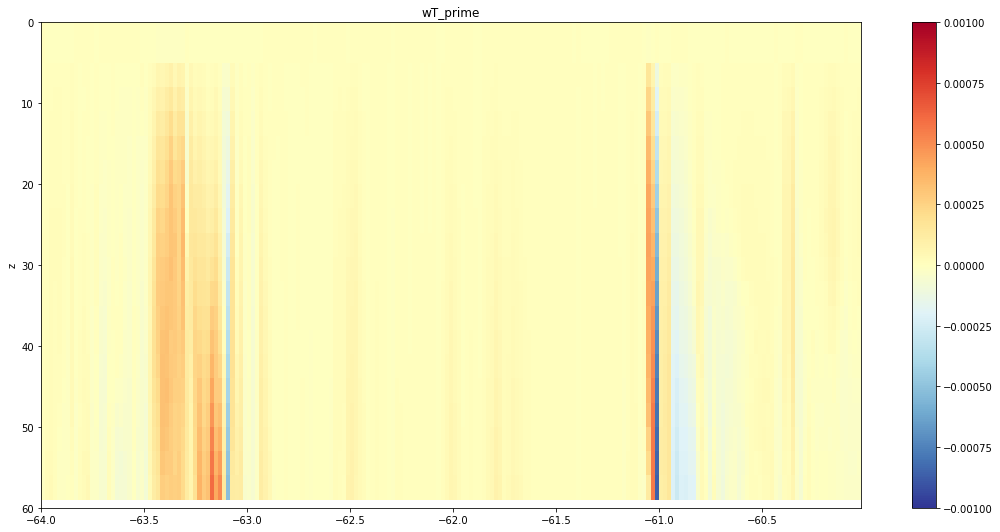

In [7]:
ylim=(60,0)
#xlim=(-61.5,-60.25)
levels=np.linspace(-5e-2,5e-2, 30)
clim = np.array([-0.025,-0.02])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthi[:20], toi, vmin=-1e-3, vmax=1e-3,  cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_ylim(ylim)
#ax0.set_xlim(xlim)
ax0.set_ylabel('z')
ax0.set_title('wT_prime')
fig.tight_layout()
#plt.savefig('../../../pics/Panel_Meeting/w_vert.pdf', dpi=150, format='pdf')

<ipython-input-13-bd5db7e7714e>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax0.pcolormesh(lon, depthc[:20], toi, clim=clim, cmap='RdYlBu_r')


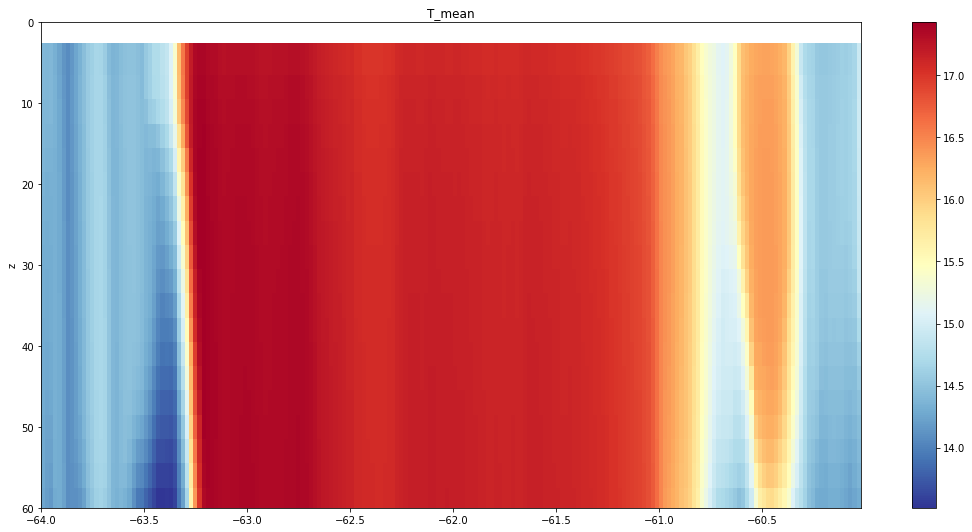

In [13]:
#A = T_mean.T #.isel(depthi=6)
#lon, lat, toi = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_regm, lat_reg=(lat_regm[0],lat_regm[0]+0.02))
#toi = np.array(toi)
#toi = toi.squeeze()
ylim=(60,0)
#xlim=(-61.5,-60.25)
levels=np.linspace(-5e-2,5e-2, 30)
clim = np.array([0,20])
fig, ax0 = plt.subplots( figsize=(15,7.5))
im = ax0.pcolormesh(lon, depthc[:20], toi, clim=clim, cmap='RdYlBu_r')
fig.colorbar(im, ax=ax0)
ax0.set_ylim(ylim)
#ax0.set_xlim(xlim)
ax0.set_ylabel('z')
ax0.set_title('T_mean')
fig.tight_layout()
#plt.savefig('../../../pics/Panel_Meeting/w_vert.pdf', dpi=150, format='pdf')